# MNIST - Categorical Classification
> # Model Capacity


In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. MNIST Data_Set Load

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# II. Data Preprocessing

> ## 1) Normalization and Reshape

* Normalization

In [3]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

* reshape

In [4]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

> ## 2) One Hot Encoding

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 3) train_test_split( )

* Train(48,000) vs. Validation(12,000)

In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 1개의 Hidden Layer & 256개의 Nodes
 - Model Capacity 낮게 조정

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation = 'relu', input_shape=(28 * 28,)))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [8]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [9]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [10]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 6s 7ms/step - loss: 0.3116 - accuracy: 0.9118 - val_loss: 0.1967 - val_accuracy: 0.9450
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 0.1425 - accuracy: 0.9585 - val_loss: 0.1388 - val_accuracy: 0.9592
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0974 - accuracy: 0.9713 - val_loss: 0.1154 - val_accuracy: 0.9667
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0720 - accuracy: 0.9787 - val_loss: 0.1012 - val_accuracy: 0.9712
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9836 - val_loss: 0.0956 - val_accuracy: 0.9718
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0445 - accuracy: 0.9871 - val_loss: 0.0916 - val_accuracy: 0.9730
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9900 - val_loss: 0.0867 - val_accuracy: 0.9753

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

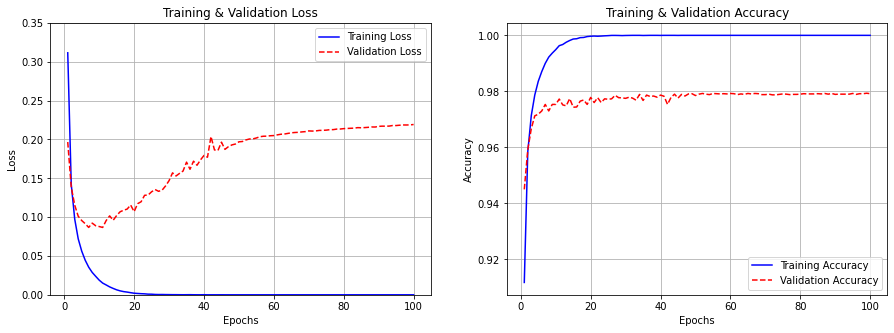

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.35)
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [12]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1820 - accuracy: 0.9807
Loss = 0.18205
Accuracy = 0.98070


# 
# 
# 
# The End
# 
# 
# 